## Observations and Insights 

In [48]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/kellenquinn/Desktop/Matplotlib-Challenge/Matplotlib-Challenge/Pymaceuticals/Resoures/Mouse_metadata.csv"
study_results_path = "/Users/kellenquinn/Desktop/Matplotlib-Challenge/Matplotlib-Challenge/Pymaceuticals/Resoures/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Study_Merge=pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")
# Display the data table for preview
Mouse_Study_Merge.head(60)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
5,b128,Capomulin,Female,9,22,25,43.262145,1
6,b128,Capomulin,Female,9,22,30,40.605335,1
7,b128,Capomulin,Female,9,22,35,37.967644,1
8,b128,Capomulin,Female,9,22,40,38.379726,2
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [30]:
# Checking the number of mice.
No_of_Mice = len(pd.unique(Mouse_Study_Merge['Mouse ID']))
print("Number of Mice:", No_of_Mice)          

Number of Mice: 249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Mice=Mouse_Study_Merge.groupby(["Mouse ID","Timepoint"]).size()
Duplicates=Duplicate_Mice>1
Duplicates.loc[Duplicates]

Mouse ID  Timepoint
g989      0            True
          5            True
          10           True
          15           True
          20           True
dtype: bool

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
#g989=Mouse_Study_Merge=="Mouse ID"=g989
g989=Mouse_Study_Merge["Mouse ID"]=="g989"
Mouse_Study_Merge[g989]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
860,g989,Propriva,Female,21,26,0,45.000000,0
861,g989,Propriva,Female,21,26,0,45.000000,0
862,g989,Propriva,Female,21,26,5,48.786801,0
863,g989,Propriva,Female,21,26,5,47.570392,0
864,g989,Propriva,Female,21,26,10,51.745156,0
865,g989,Propriva,Female,21,26,10,49.880528,0
866,g989,Propriva,Female,21,26,15,51.325852,1
867,g989,Propriva,Female,21,26,15,53.442020,0
868,g989,Propriva,Female,21,26,20,55.326122,1
869,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse=Mouse_Study_Merge[~g989]
Clean_Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1888,m601,Capomulin,Male,22,17,25,33.118756,1
1889,m601,Capomulin,Male,22,17,30,31.758275,1
1890,m601,Capomulin,Male,22,17,35,30.834357,1
1891,m601,Capomulin,Male,22,17,40,31.378045,1


In [34]:
# Checking the number of mice in the clean DataFrame.
No_of_Mice_Clean= len(pd.unique(Clean_Mouse['Mouse ID']))
print("Number of Mice:", No_of_Mice_Clean)          

Number of Mice: 248


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [35]:
Regimen_Mean=Clean_Mouse.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Regimen_Mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [36]:
Regimen_variance=Clean_Mouse.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [37]:
Regimen_median=Clean_Mouse.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [38]:
Regimen_std=Clean_Mouse.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
Regimen_SEM=Clean_Mouse.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
Regimen_SEM

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_Overview=pd.DataFrame({'Mean': Regimen_Mean,'Median': Regimen_median,'Variance':Regimen_variance, 'Std': Regimen_std, 'SEM': Regimen_SEM})
#Regimen_Overview.set_index('Drug Regimen')
Regimen_Overview.head(60)
# Using the aggregation method, produce the same summary statistics in a single line
Regimen_Overview_Agg=Clean_Mouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
Regimen_Overview_Agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen.
Regimen_Measurements=Clean_Mouse.groupby(["Drug Regimen"]).count()["Mouse ID"]
Regimen_Measurements


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

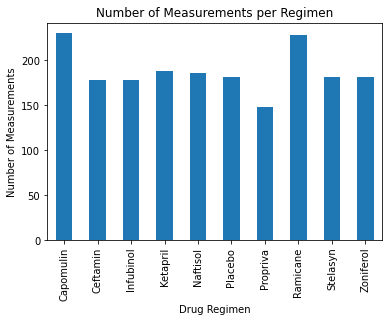

In [41]:
#Bar Plot Showing Number of Measurements per Regimen using Pandas
Regimen_Measurements.plot(kind="bar")

#Chart Labels
plt.title("Number of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

#Chart
plt.show()

In [53]:
#Bar Plot Showing Number of Measurements per Regimen using Numplotlib
x_axis=np.arange(len(Regimen_Measurements))
Drug_Regimen=Clean_Mouse['Drug Regimen'].value_counts()
plt.bar(Drug_Regimen.index.value,Drug_Regimen.values)
plt.show()

##['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
#tick_locations= []
#for x in x_axis:
 #   tick_locations.append(x)

#Chart Labels and Setup 
plt.figure(figsize=(15,4))
plt.title("Number of Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements") 
plt.bar(x_axis, Regimen_Measurements, facecolor="red", alpha=1.00, align="center")
plt.xticks(tick_locations, Drug_Regimen)

AttributeError: 'Index' object has no attribute 'value'

Male      958
Female    922
Name: Sex, dtype: int64


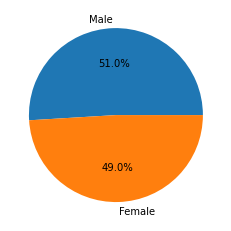

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_Gender=Clean_Mouse.Sex.value_counts()
print(Mouse_Gender)
plt.pie(Mouse_Gender.values,labels=Mouse_Gender.index.values, autopct="%1.1f%%")
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
